# IPL Prediction

In [1]:
# Importing Necessary Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sns
import pickle
%matplotlib inline

# Analysing Data

In [2]:
#reading the dataset from csv file
matches = pd.read_csv('ipl.csv')

In [3]:
matches.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
matches.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [5]:
matches.shape

(76014, 15)

# Data Cleaning

In [6]:
#removing the unnecessary columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
matches.drop(labels=columns_to_remove, axis=1, inplace=True)

In [7]:
matches.bat_team.unique() 

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [8]:
matches.replace(to_replace ="Delhi Daredevils", 
                 value = "Delhi Capitals", 
                  inplace = True)
matches.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [9]:
current_teams = ['Chennai Super Kings', 'Delhi Capitals' , 'Kings XI Punjab', 
                 'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
                 'Royal Challengers Bangalore', 'Sunrisers Hyderabad']

In [10]:
matches = matches[(matches['bat_team'].isin(current_teams)) & (matches['bowl_team'].isin(current_teams))]

In [11]:
print(matches.bat_team.unique())    #categorial feature 1
print(matches.bowl_team.unique())   #categorial feature 2

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Capitals' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Capitals'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [12]:
#setting minimum over before prediction
matches = matches[matches['overs']>=6.0]

In [13]:
matches.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
38,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,62,1,6.1,55,1,222
39,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,63,1,6.2,52,1,222
40,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,64,1,6.3,47,1,222
41,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,66,1,6.4,45,1,222
42,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,67,1,6.5,46,1,222


In [14]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37389 entries, 38 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            37389 non-null  object 
 1   bat_team        37389 non-null  object 
 2   bowl_team       37389 non-null  object 
 3   runs            37389 non-null  int64  
 4   wickets         37389 non-null  int64  
 5   overs           37389 non-null  float64
 6   runs_last_5     37389 non-null  int64  
 7   wickets_last_5  37389 non-null  int64  
 8   total           37389 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 2.9+ MB


In [15]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
matches['date'] = matches['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [16]:
matches.date.dtype

dtype('<M8[ns]')

# Data Preprocessing

In [17]:
#using OneHotEncoding to add categorial features that are main teams playing against each other , Bat_Team and Bowl_Team
match_df = pd.get_dummies(data=matches, columns=['bat_team', 'bowl_team'])

In [18]:
match_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
38,2008-04-18,62,1,6.1,55,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
39,2008-04-18,63,1,6.2,52,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
40,2008-04-18,64,1,6.3,47,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
41,2008-04-18,66,1,6.4,45,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
42,2008-04-18,67,1,6.5,46,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
match_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Capitals',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Capitals',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [20]:
# Data Splitting:

X_train = match_df.drop(labels='total',axis=1)[match_df['date'].dt.year <= 2016]
X_test = match_df.drop(labels='total',axis=1)[match_df['date'].dt.year >= 2017]

In [21]:
y_train = match_df[match_df['date'].dt.year <= 2016]['total'].values
y_test = match_df[match_df['date'].dt.year >= 2017]['total'].values

In [22]:
X_train.drop(labels='date',axis=True, inplace=True)
X_test.drop(labels='date',axis=True, inplace=True)

<H1> Model Development

<H2>Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [24]:
reg.score(X_train,y_train)

0.6757883503217181

In [25]:
reg.score(X_test,y_test)

0.7718585953733966

In [26]:
reg.predict([[62,1,5,55,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0]])

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([185.50710723])

<H2> Ridge Regression

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [28]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,35,50,80,100,150,200]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X_train,y_train)

C:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.71686e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.53371e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.60063e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.63167e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.6016e-18): result 

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 35, 50, 80, 100, 150, 200]},
             scoring='neg_mean_squared_error')

In [29]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 200}
-300.1410720006314


In [30]:
ridge_regressor.predict([[62,1,5,55,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0]])

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([185.60747543])

In [31]:
ridge_regressor.score(X_train,y_train)

-283.74945871384915

In [32]:
ridge_regressor.score(X_test,y_test)

-230.39437043870552

In [34]:
prediction=ridge_regressor.predict(X_test)

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

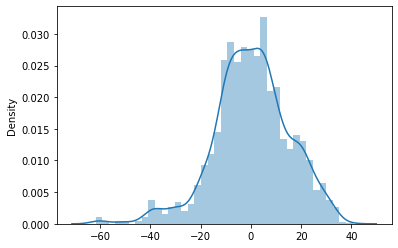

In [35]:
sns.distplot(y_test-prediction)

In [36]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 11.688985754231354
MSE: 230.39437043870552
RMSE: 15.178747327717973


<H2> Lasso Regression

In [37]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [38]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,35,50,80,100,150,200]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=10)
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.252e+06, tolerance: 2.631e+03
  model = cd_fast.enet_coordinate_descent(
C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.462e+06, tolerance: 2.762e+03
  model = cd_fast.enet_coordinate_descent(
C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.395e+06, tolerance: 2.735e+03
  model = cd_fast.enet_

C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.269e+05, tolerance: 2.740e+03
  model = cd_fast.enet_coordinate_descent(


{'alpha': 1}
-296.15036055477674


In [39]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-296.15036055477674


In [40]:
lasso_regressor.predict([[62,1,5,55,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0]])

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([187.86499899])

In [41]:
lasso_regressor.score(X_train,y_train)

-293.11585518355025

In [42]:
Lasso_prediction=lasso_regressor.predict(X_test)

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

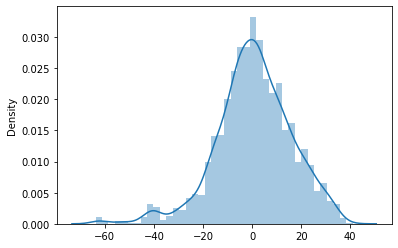

In [43]:
sns.distplot(y_test-Lasso_prediction)

In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, Lasso_prediction))
print('MSE:', metrics.mean_squared_error(y_test, Lasso_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Lasso_prediction)))

MAE: 11.786988718226594
MSE: 240.40319798703845
RMSE: 15.504941082991527


In [45]:
file_name = 'ipl_score_predict_model.pkl'
pickle.dump(reg , open(file_name,'wb'))